In [38]:
#import necessary library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [39]:
df = pd.read_csv("/kaggle/input/emotiondata/train.txt",sep=";",names=["Description","Emotion"])
df.head()

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [40]:
df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

##  Map emotions to numerical values

In [41]:
df['Emotion_num'] = df['Emotion'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise':5
})
df.head()

,Description,Emotion,Emotion_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


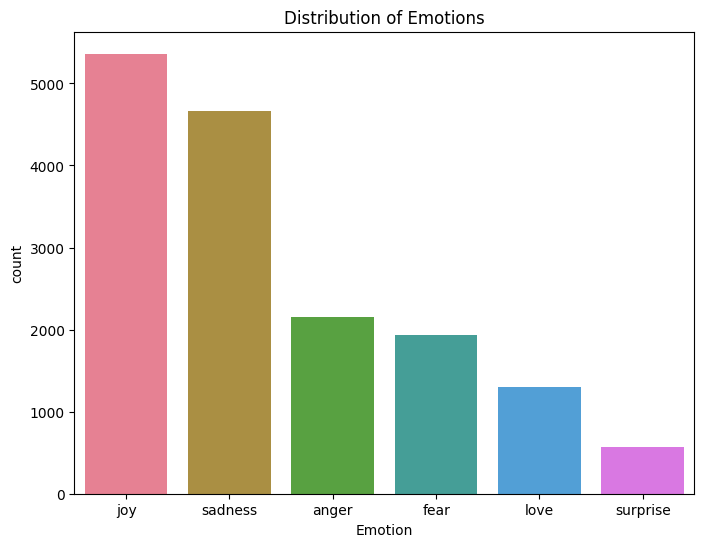

In [42]:
#Bar plot for emotion distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index, palette="husl")
plt.title('Distribution of Emotions')
plt.show()

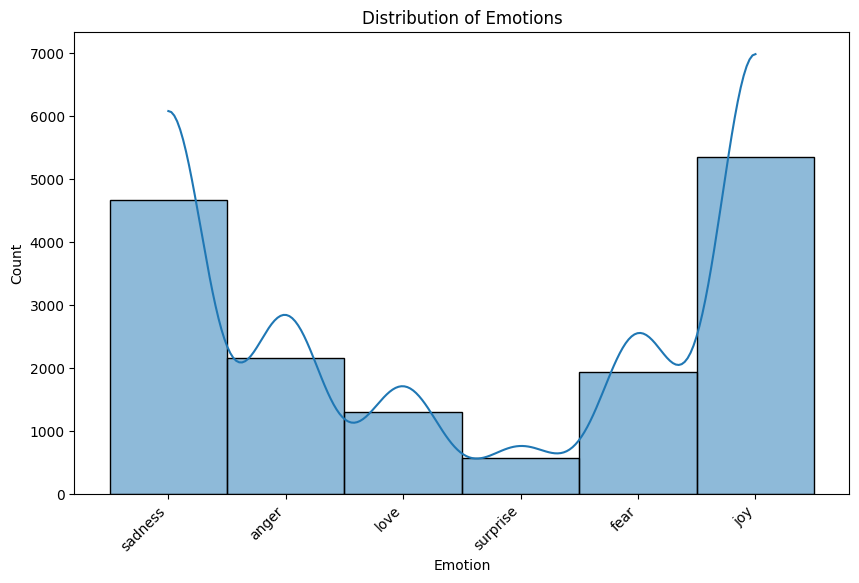

In [43]:
# Histogram plot for emotion distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(x='Emotion', data=df, kde=True, palette='Set2', element='bars', stat='count',
             common_norm=False)
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [44]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using spaCy
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [45]:
df['processed_text'] = df["Description"].apply(preprocess)
df

,Description,Emotion,Emotion_num,processed_text
0,i didnt feel humiliated,sadness,1,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,1,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,joy,0,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,2,feel like rude comment m glad t


# Train-test split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Emotion_num'], test_size=0.2, random_state=42)

# KNN

In [47]:
# KNN
knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier())
])
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [48]:
print("Classification Report:\n", classification_report(y_test, knn_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75      1021
           1       0.73      0.82      0.77       946
           2       0.76      0.61      0.68       427
           3       0.77      0.52      0.62       397
           4       0.77      0.35      0.48       296
           5       0.64      0.30      0.41       113

    accuracy                           0.71      3200
   macro avg       0.72      0.58      0.62      3200
weighted avg       0.72      0.71      0.69      3200



# Logistic Regression

In [49]:
# Logistic Regression
lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

In [50]:
print("Classification Report:\n", classification_report(y_test, lr_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      1021
           1       0.87      0.94      0.90       946
           2       0.90      0.77      0.83       427
           3       0.85      0.70      0.77       397
           4       0.89      0.55      0.68       296
           5       0.88      0.43      0.58       113

    accuracy                           0.84      3200
   macro avg       0.86      0.73      0.77      3200
weighted avg       0.85      0.84      0.83      3200



# Multinomial Naive Bayes

In [51]:
# Multinomial Naive Bayes
nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

In [52]:
print("Classification Report:\n", classification_report(y_test, nb_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.99      0.71      1021
           1       0.69      0.90      0.78       946
           2       0.91      0.17      0.29       427
           3       0.93      0.11      0.19       397
           4       1.00      0.01      0.01       296
           5       0.00      0.00      0.00       113

    accuracy                           0.62      3200
   macro avg       0.68      0.36      0.33      3200
weighted avg       0.71      0.62      0.52      3200



# Random Forest

In [53]:
# Random Forest
rfc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(random_state=42))
])
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

In [54]:
print("Classification Report:\n", classification_report(y_test, rfc_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      1021
           1       0.91      0.89      0.90       946
           2       0.90      0.80      0.85       427
           3       0.86      0.80      0.83       397
           4       0.87      0.66      0.75       296
           5       0.87      0.66      0.75       113

    accuracy                           0.85      3200
   macro avg       0.87      0.79      0.82      3200
weighted avg       0.86      0.85      0.85      3200



# Confusion Matrix Heatmap for Random Forest

In [56]:
cm = confusion_matrix(y_test, rfc_y_pred)
cm

array([[960,  26,   4,   8,  21,   2],
       [ 67, 844,  17,  11,   6,   1],
       [ 43,  30, 342,  12,   0,   0],
       [ 44,  13,  12, 319,   1,   8],
       [ 88,   6,   6,   1, 195,   0],
       [ 12,   4,   0,  22,   0,  75]])

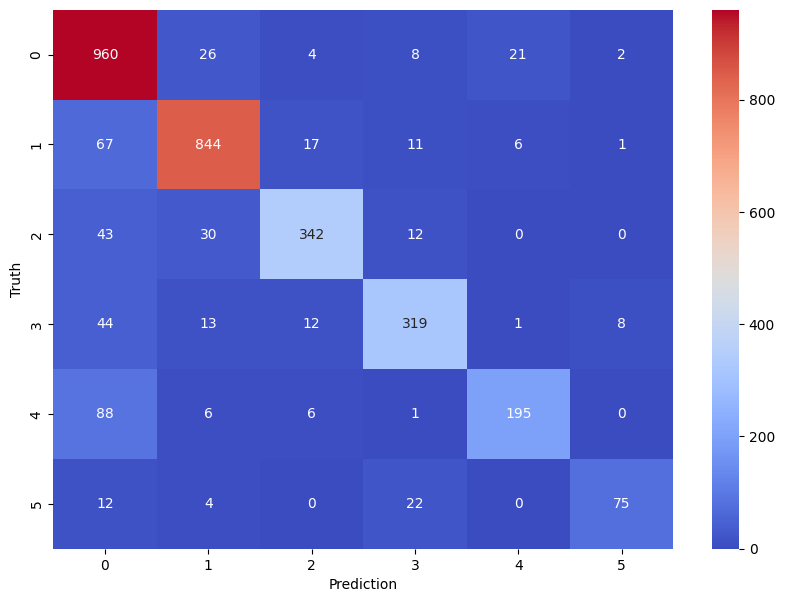

In [58]:
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show()